В файлах резальтаты двух экспериментов. В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные 
Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый

Ваша задача – проверить гипотезы, сделать соответствующие выводы на основе статистических тестов и принять решения.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import statsmodels.stats.multicomp as stmm

sns.set(
    font_scale=1.2
)

In [16]:
data_photo = pd.read_csv('5_task_1.csv')
data_photo.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


5_task_1:

id – id клиента в эксперименте

group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)

events – сколько блюд суммарно было заказано за период

# Нужно проверить, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в среднем покупали больше всего.

Всего пользователям показывались три варианта:

A – прямоугольные 16:9

B – квадратные

C – прямоугольные 12:4

* Убедитесь, что данные распределены нормально, сравните  результат с qq-графиками. 

In [18]:
pg.normality(data=data_photo, dv="events", group="group", method='normaltest')

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

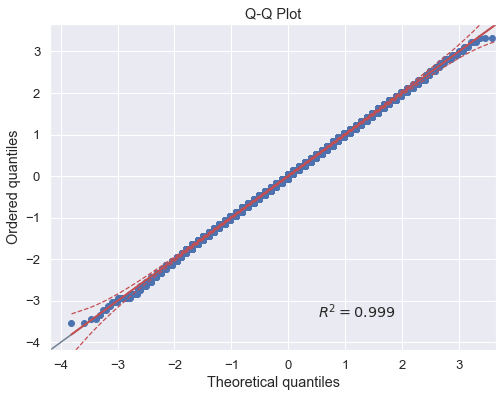

In [98]:
pg.qqplot(data_photo[data_photo.group == 'A'].events, dist='norm', figsize=(8, 6))

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

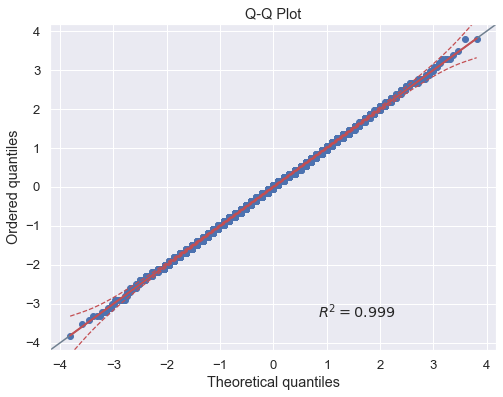

In [99]:
pg.qqplot(data_photo[data_photo.group == 'B'].events, dist='norm', figsize=(8, 6))

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

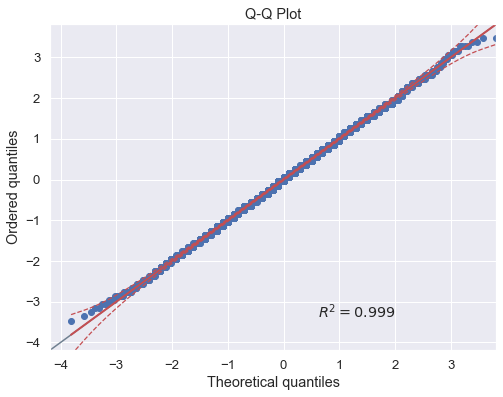

In [100]:
pg.qqplot(data_photo[data_photo.group == 'C'].events, dist='norm', figsize=(8, 6))

### Все распределения нормальные

* Проверим на гомогенность дисперсий 

In [13]:
pg.homoscedasticity(data=data_photo, dv='events', group='group')

,W,pval,equal_var
levene,2.26226,0.104133,True


### С дисперсиями все норм

<AxesSubplot:xlabel='group', ylabel='events'>

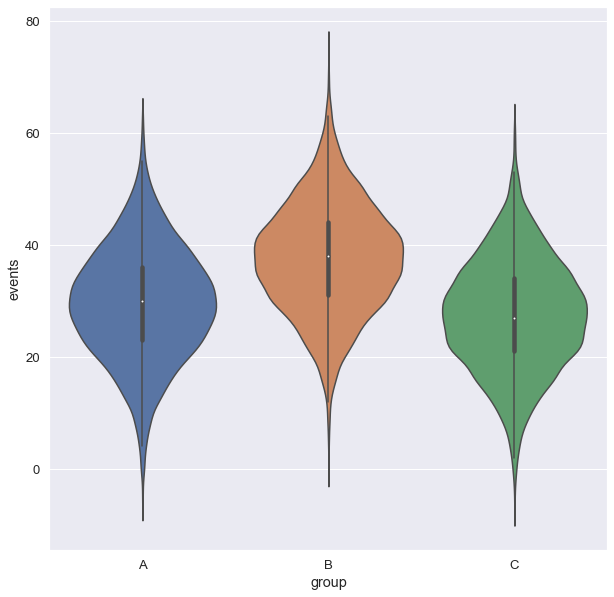

In [10]:
plt.figure(figsize=(10,10))
sns.violinplot(data=data_photo, x='group', y='events')

* Проводим ANOVA-тест

In [14]:
pg.anova(data=data_photo, dv="events", between="group")

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


### ANOVA показывает, что различия между размерами фотографий есть

### Теперь, используйя критерий Тьюки,  определим, между какими группами есть статистически значимые различия

In [33]:
pg.pairwise_tukey(data=data_photo, dv="events", between="group")

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.018089


* Попробуем другие варианты поправок на множественные сравнения через pingouin. 

In [38]:
pg.pairwise_tests(data=data_photo, dv="events", between="group", padjust='holm')

/Users/d.alekss/opt/anaconda3/lib/python3.9/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)
/Users/d.alekss/opt/anaconda3/lib/python3.9/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,group,A,B,False,True,-57.011134,19998.0,two-sided,0.000000e+00,0.000000e+00,holm,inf,-0.806229
1,group,A,C,False,True,14.886135,19998.0,two-sided,7.500262e-50,7.500262e-50,holm,1.054e+46,0.210514
2,group,B,C,False,True,72.420220,19998.0,two-sided,0.000000e+00,0.000000e+00,holm,inf,1.024138


* Попробуем через statsmodels

In [40]:
stmm.pairwise_tukeyhsd(data_photo.events, data_photo.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,-0.0,7.7038,8.3642,True
A,C,-2.1093,-0.0,-2.4395,-1.7791,True
B,C,-10.1433,-0.0,-10.4735,-9.8131,True


### Тесты показывают, что различия между всеми группами значимые 

### Можно сделать вывод о том, что картинки из второй группы использовать выгоднее

# Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

In [42]:
data_button = pd.read_csv('5_task_2.csv')
data_button.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


5_task_2:

id – id клиента в эксперименте

segment – сегмент (high/low)

group – вид кнопки (control – старая версия, test – новая версия)

events – сколько блюд суммарно было заказано за период

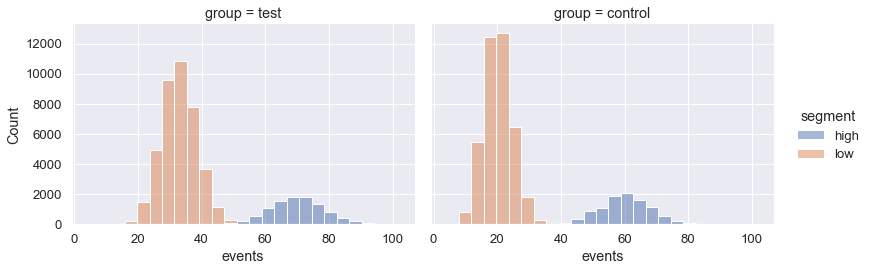

In [63]:
sns.displot(data=data_button, x='events', hue='segment', height=4, aspect=1.4, bins=25, col='group')

### Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

In [69]:
statistics = data_button \
    .groupby(['group','segment'], as_index=False) \
    .agg({'events': ['mean', 'median', 'std']}) \
    .rename(columns={'events':'events_stat'})

In [70]:
statistics

group segment events_stat                 
                          mean median       std
0  control    high   59.970800   60.0  7.805347
1  control     low   20.031575   20.0  4.473576
2     test    high   69.938500   70.0  8.403974
3     test     low   33.025925   33.0  5.720845

### Проведите тест, а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.

In [101]:
pg.anova(data=data_button, dv='events', between=['group', 'segment'], effsize='n2')

,Source,SS,DF,MS,F,p-unc,n2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.124086
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377485,0.000000e+00,0.763973
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.001185
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


<AxesSubplot:xlabel='segment', ylabel='events'>

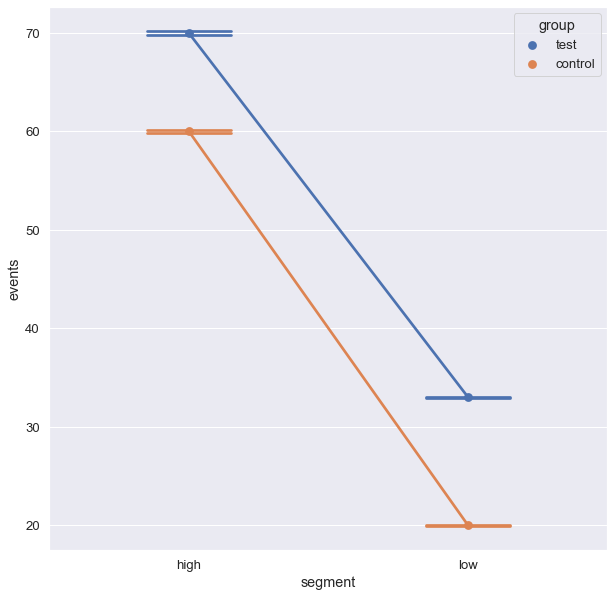

In [85]:
plt.figure(figsize=(10, 10))
sns.pointplot(x = 'segment', y = 'events', hue = 'group', data = data_button, capsize = .3)

### Различия между кластерами есть. Наибольший вклад в эти различия вкладывает разница по сегменту. Новый дизайн кнопки также дает прирост